***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [42]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [43]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0.0,23.0,8.0,12.0,800.0,1.603808
1,11,1.0,23.0,2.0,12.0,1150.0,1.739790
2,11,1.0,35.0,8.0,15.0,880.0,1.760444
3,11,0.0,46.0,2.0,6.0,3500.0,1.783158
4,11,1.0,47.0,8.0,9.0,150.0,1.690631
...,...,...,...,...,...,...,...
118378,53,1.0,46.0,2.0,11.0,812.0,1.687030
118379,53,0.0,30.0,4.0,7.0,1500.0,1.792934
118380,53,0.0,32.0,8.0,12.0,1300.0,1.830587
118381,53,0.0,57.0,8.0,4.0,1500.0,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [44]:
classes = [0, 788*2, 788*5, 788*15, 788*25, 20000]

### 2º Definir os labels das classes

In [45]:
labels = ['Classe E', 'Classe D', 'Classe C', 'Classe B', 'Classe A']

### 3º Construir a coluna de frequências

In [46]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados['Renda'],
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)
frequencia

Classe E    72470
Classe D    31449
Classe C    12267
Classe B     1455
Classe A      295
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [47]:
percentual = pd.value_counts(
    pd.cut(
        x = dados['Renda'],
        bins = classes,
        labels = labels,
        include_lowest = True
    ),
    normalize = True
)
percentual

Classe E    0.614486
Classe D    0.266662
Classe C    0.104014
Classe B    0.012337
Classe A    0.002501
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [48]:
df_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Percentual': percentual}
)
df_renda.sort_index(ascending = False)

,Frequência,Percentual
Classe A,295,0.002501
Classe B,1455,0.012337
Classe C,12267,0.104014
Classe D,31449,0.266662
Classe E,72470,0.614486


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

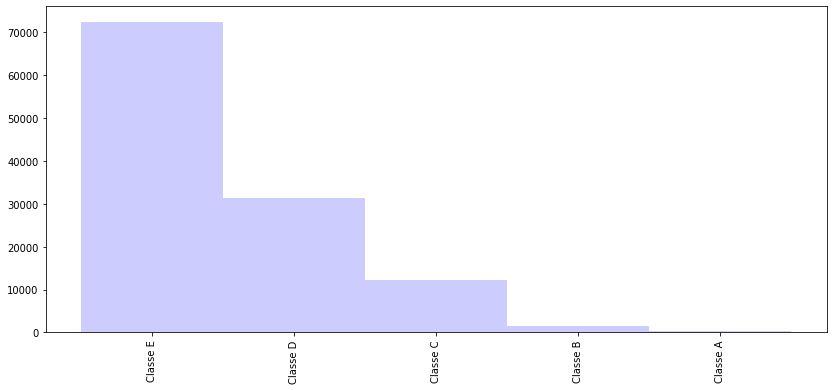

In [49]:
df_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14,6))

> ### Conclusões

O Gráfico de renda por classe social no brasil é assimétrico à direita. 
É possível concluir que existe um grande número de pessoas na base na pirâmide social brasileira e um número ínfimo no topo. Isto é, as classes baixas são muito mais numerosas que as classes altas no Brasil, havendo grande concentração de renda e desigualdade social.
Mesmo entre os mais ricos exite uma grande diferença sendo de difícil análise quanto tenta-se analisar apenas as classes A e B, sendo este também assimétrico à direita.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [50]:
n = dados.shape[0]
n

118383

In [51]:
k = 1 + (10 / 3) * np.log10(n)
k

17.910964471462165

In [52]:
k = round(k)
k

18

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


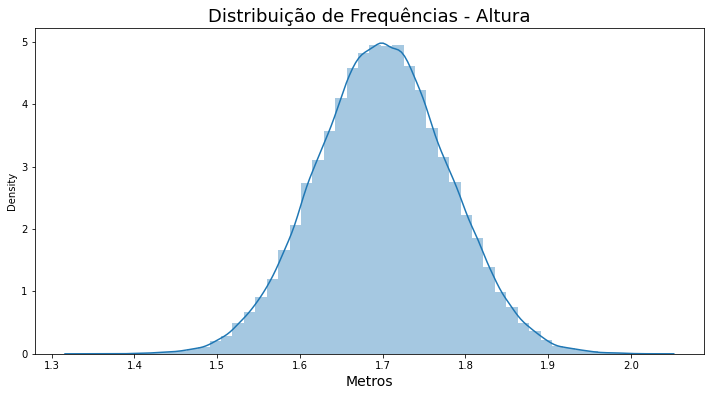

In [53]:

ax = sns.distplot(dados.Altura, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


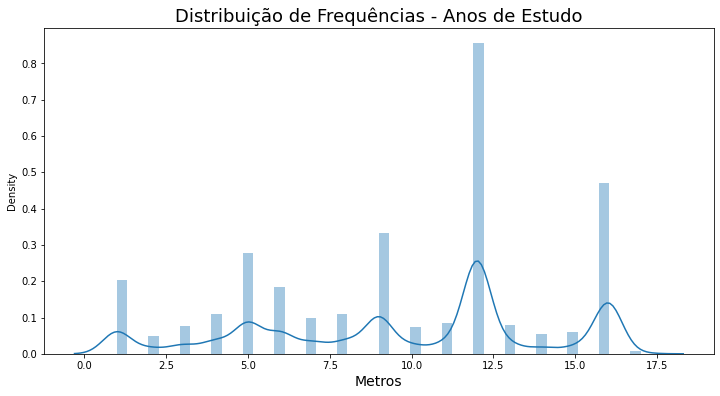

In [54]:
ax = sns.distplot(dados['Anos de Estudo'], kde = True, bins = 50)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Anos de Estudo', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


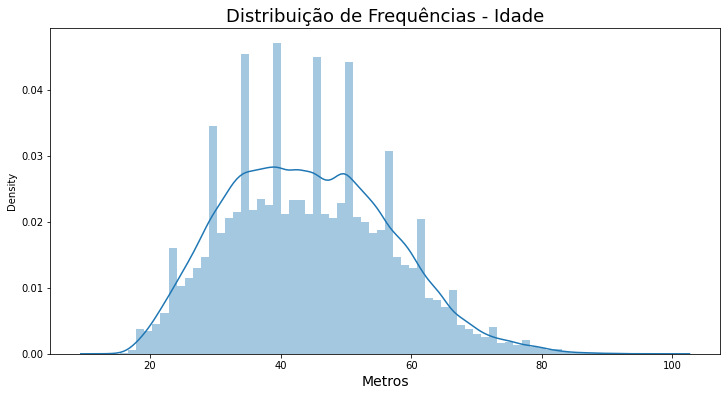

In [55]:
ax = sns.distplot(dados['Idade'], kde = True, bins = 70)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

> ### Conclusões

É possível concluir que enquanto a alura é uma medida de tendência central, os anos de estudo são uma medida assimétrica a esquerda. A idade é assimétrica à direita, sendo porém, menos assimétrica do que os anos de estudo.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


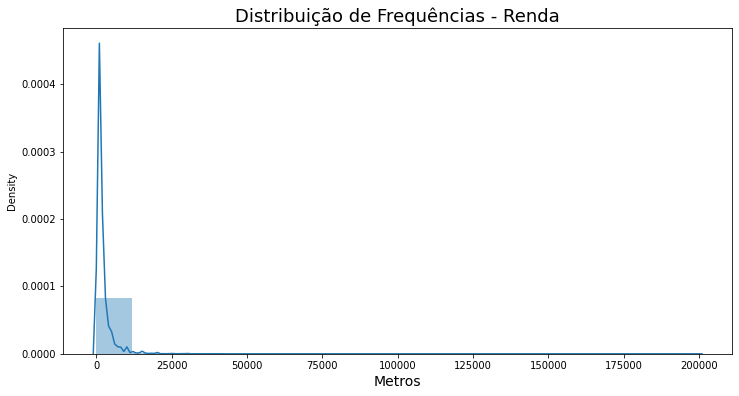

In [56]:
ax = sns.distplot(dados['Renda'], kde = True, bins = 17)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [57]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [155]:
uf.values()

dict_values(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])

In [58]:
frequencia = pd.crosstab(
    dados.Sexo,
    dados.Cor,
    )

frequencia.rename(index = sexo, inplace = True)
frequencia.rename(index = cor, inplace = True)
frequencia

Cor,0.0,2.0,4.0,6.0,8.0
Sexo,,,,,
Masculino,325,38349,7996,429,35025
Feminino,141,16640,4212,196,15069


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [59]:
dados['Renda'].mean()

2153.6558513963273

### Obtenha a mediana

In [60]:
dados['Renda'].median()

1300.0

### Obtenha a moda

In [61]:
dados['Renda'].mode()[0]

788.0

### Obtenha o desvio médio absoluto

In [62]:
dados['Renda'].mad()

1625.1907467068631

### Obtenha a variância

In [63]:
dados['Renda'].var()

12278882.931855971

### Obtenha o desvio-padrão

In [64]:
dados['Renda'].std()

3504.12370384608

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [65]:
renda_por_sexo_e_cor = pd.crosstab(dados['Cor'],
                                   dados['Sexo'],
                                   values = dados['Renda'],
                                   aggfunc = {'mean', 'median', 'max'}
)
renda_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_por_sexo_e_cor

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1191.138462  3173.581560     900.0    800.0
Branca    200000.0  100000.0  3032.731910  2163.837680    1800.0   1200.0
Preta      50000.0   23000.0  1704.096423  1197.079772    1200.0    850.0
Amarela    50000.0   20000.0  4801.668998  3356.989796    3000.0   2000.0
Parda     100000.0   30000.0  1766.989493  1230.091512    1200.0    800.0

> ### Conclusões

A renda média feminina é menor para todas as cores, exceto a indígena, onde há também a maior discrepância entre homens e mulheres. A cor com maiores salários em média para homens é a amarela, seguida respectivamente das cores branca, parda, preta e indígena. Para mulheres a diferença está que a cor indígena ocupa a segunda posição de remuneração média. De resto, há a mesma ordem dos homens.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [66]:
dispersao_renda_por_sexo_e_cor = pd.crosstab(
    dados['Cor'],
    dados['Sexo'],
    values = dados['Renda'],
    aggfunc = {'mad', 'var', 'std'}
)
dispersao_renda_por_sexo_e_cor.rename(index = cor, inplace = True)
dispersao_renda_por_sexo_e_cor.rename(columns = sexo, inplace = True)
dispersao_renda_por_sexo_e_cor

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   822.788734  4038.325537  1203.276208  14218.018350  1.447874e+06   
Branca    2306.948736  1690.257475  4811.321842   3320.251085  2.314882e+07   
Preta     1013.193833   732.780596  1991.304795   1415.963502  3.965295e+06   
Amarela   3628.460071  2758.689608  5430.684004   3925.770610  2.949233e+07   
Parda     1160.452335   827.167303  2395.638439   1628.487360  5.739084e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  2.021520e+08  
Branca    1.102407e+07  
Preta     2.004953e+06  
Amarela   1.541167e+07  
Parda     2.651971e+06

> ### Conclusões

As ordem de dispersão de salário por cores segue o mesmo padrão para os três indicadores. Maiores rendas, correspondem predominantemente a maiores medidas de dispersão. Mulheres indígenas é a categoria em que há a maior dispersão com bastante folga, seguido dos homens amarelos. As menores são entre mulheres pretas e pardas também distantes do terceiro lugar que são os homens indígenas. 

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [67]:
dados_renda_menor_10000 = dados.query('Renda < 10000')

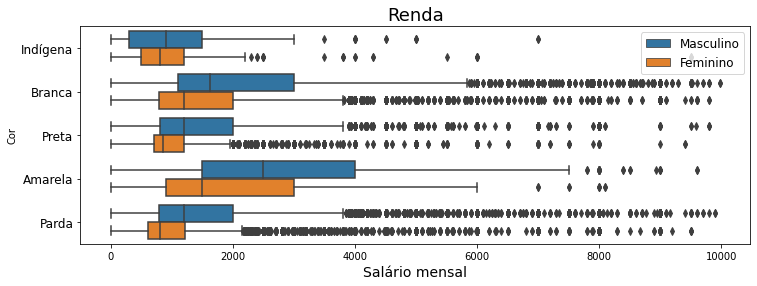

In [68]:
ax = sns.boxplot(
            x = 'Renda',
            y = 'Cor',
            hue = 'Sexo',
            data = dados_renda_menor_10000,
            orient = 'h'
)
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Salário mensal', fontsize=14)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'],fontsize = 12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)


ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [152]:
from scipy import stats

percentual = stats.percentileofscore(dados['Renda'], 788, kind = 'weak')
print('{0:.2f}%'.format(percentual))

24.40%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [73]:
dados['Renda'].quantile([i / 100 for i in range(1, 100)])
 

0.01        0.0
0.02        0.0
0.03        0.0
0.04      100.0
0.05      200.0
         ...   
0.95     7000.0
0.96     8000.0
0.97     9500.0
0.98    10857.6
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [77]:
dados['Renda'].quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [83]:
sexo

{0: 'Masculino', 1: 'Feminino'}

In [153]:
estatistica_renda_anos_estudo_sexo = pd.crosstab(
    dados['Anos de Estudo'],
    dados['Sexo'],
    values = dados['Renda'],
    aggfunc = {'mean', 'median', 'max', 'std'})

estatistica_renda_anos_estudo_sexo.rename(columns = sexo, inplace = True)
estatistica_renda_anos_estudo_sexo.rename(index = anos_de_estudo, inplace = True)
estatistica_renda_anos_estudo_sexo

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   885.649476   579.205005   
1 ano                            30000.0    2000.0   968.641643   541.698529   
2 anos                           40000.0    4000.0  1013.711744   581.060332   
3 anos                           80000.0    3500.0  1202.257179   588.201873   
4 anos                           50000.0   10000.0  1383.184549   749.968049   
5 anos                           35000.0    8000.0  1435.582101   832.047322   
6 anos                           25000.0    6000.0  1535.051967   859.752266   
7 anos                           40000.0    9000.0  1542.743496   880.429324   
8 anos                           30000.0   18000.0  1714.352507   977.318080   
9 anos                           60000.0   20000.0  1601.197328   931.358974   
10 anos                          45000.0    6000.0  1820.493001   974.624211   
11 anos                         200000.0  100000.0  2202.208989  1353.928051   
12 anos                          30000.0  120000.0  2553.333507  1753.333648   
13 anos                          25000.0   20000.0  3332.674521  1960.650957   
14 anos                          50000.0   20000.0  3812.556209  2312.007659   
15 anos ou mais                 200000.0  100000.0  6341.235321  4040.106331   
Não determinados                  7000.0    3000.0  1401.940789   845.473684   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     788.0    450.0  1058.261983   692.960097  
1 ano                              788.0    455.0  1324.877972   443.997753  
2 anos                             788.0    550.0  1594.697591   515.520940  
3 anos                             900.0    600.0  2454.413874   438.649584  
4 anos                            1100.0    788.0  1499.542380   651.642321  
5 anos                            1200.0    788.0  1597.242476   661.867496  
6 anos                            1200.0    788.0  1517.794794   539.969275  
7 anos                            1250.0    800.0  1495.056187   634.601637  
8 anos                            1400.0    800.0  1508.745227   932.962299  
9 anos                            1300.0    800.0  2280.718590  1089.065223  
10 anos                           1400.0    882.5  2059.085926   632.324370  
11 anos                           1600.0   1000.0  2503.530837  1966.241508  
12 anos                           1900.0   1200.0  2362.301558  5344.884795  
13 anos                           2500.0   1500.0  2892.599731  2020.049087  
14 anos                           2800.0   1800.0  3987.312836  2021.960906  
15 anos ou mais                   4200.0   2960.0  7727.285344  4374.011887  
Não determinados                  1200.0    788.0  1038.373201   447.689939

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

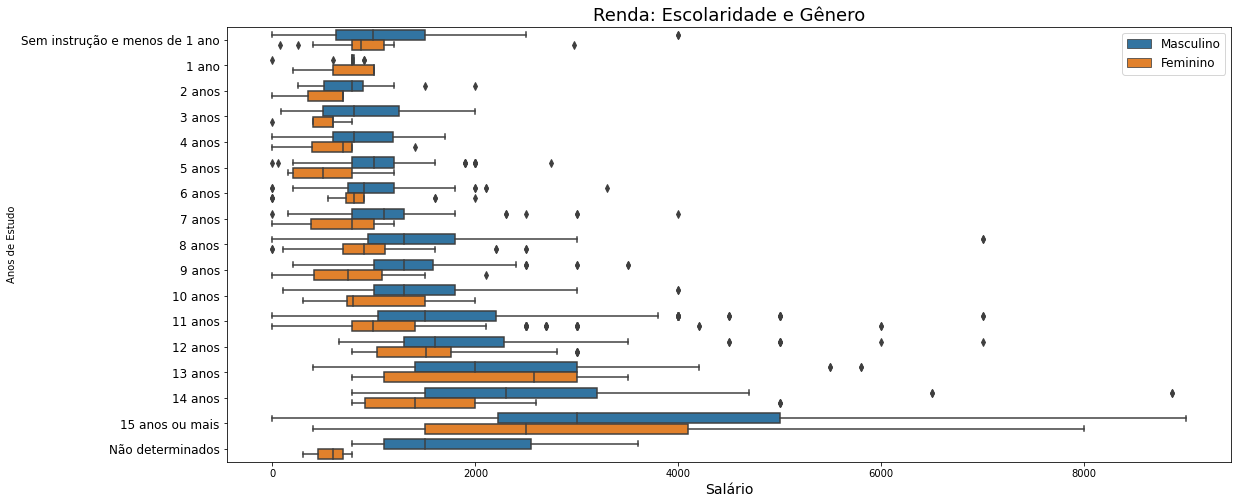

In [156]:
ax = sns.boxplot(x = 'Renda',
                 y = 'Anos de Estudo',
                 hue = 'Sexo',
                 data = dados[(dados['Renda']<10000) & (dados['Idade'] == 30)],
                 orient = 'h')

ax.figure.set_size_inches(18, 8)
ax.set_title('Renda: Escolaridade e Gênero', fontsize=18)
ax.set_xlabel('Salário', fontsize=14)
ax.set_yticklabels(anos_de_estudo.values(), fontsize = 12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

> ### Conclusões

É possível concluir que as faixas com menor grau de escolaridade apresentam menor renda. Há menores taxas de dispersão de valores de renda entre eleitores. Para os brasileiras que apresentam menor escolaridade, há normalmente menos dispersão entre os valores de salários em relação dos homens da mesma faixa. Apesar de isso estar presente em todas as faixas de escolaridade, nas de tempo mais curto essa característica é mais proeminente.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [157]:
renda_estatistica = dados.groupby(uf).agg({'Renda':['mean', 'median', 'max', 'std']})
renda_estatistica.rename(index = uf)

renda_estatistica


Renda                    
                       mean  median     max std
Acre                 1200.0  1200.0  1200.0 NaN
Alagoas              1700.0  1700.0  1700.0 NaN
Amapá                1050.0  1050.0  1050.0 NaN
Amazonas             2000.0  2000.0  2000.0 NaN
Bahia                2400.0  2400.0  2400.0 NaN
Ceará                1000.0  1000.0  1000.0 NaN
Distrito Federal     4500.0  4500.0  4500.0 NaN
Espírito Santo       1300.0  1300.0  1300.0 NaN
Goiás                1500.0  1500.0  1500.0 NaN
Maranhão             4000.0  4000.0  4000.0 NaN
Mato Grosso          2300.0  2300.0  2300.0 NaN
Mato Grosso do Sul   3000.0  3000.0  3000.0 NaN
Minas Gerais          920.0   920.0   920.0 NaN
Paraná                900.0   900.0   900.0 NaN
Paraíba               788.0   788.0   788.0 NaN
Pará                 6000.0  6000.0  6000.0 NaN
Pernambuco           1600.0  1600.0  1600.0 NaN
Piauí                 788.0   788.0   788.0 NaN
Rio Grande do Norte   800.0   800.0   800.0 NaN
Rio Grande do Sul     300.0   300.0   300.0 NaN
Rio de Janeiro       2000.0  2000.0  2000.0 NaN
Rondônia             2500.0  2500.0  2500.0 NaN
Roraima              2000.0  2000.0  2000.0 NaN
Santa Catarina          0.0     0.0     0.0 NaN
Sergipe              2000.0  2000.0  2000.0 NaN
São Paulo             600.0   600.0   600.0 NaN
Tocantins            7000.0  7000.0  7000.0 NaN

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [150]:
uf_lista = ['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

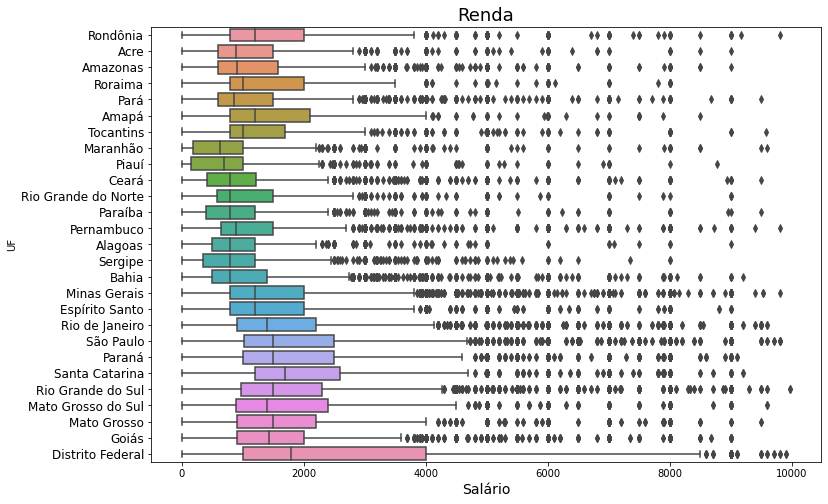

In [151]:
ax = sns.boxplot(
            x = 'Renda',
            y = 'UF',
            data = dados[dados['Renda'] < 10000],
            orient = 'h'
)


ax.figure.set_size_inches(12, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Salário', fontsize=14)
ax.set_yticklabels(uf_lista, fontsize = 12)


ax

> ### Conclusões

O distrito federal possui renda média maior que os estados. Os estados da região sul possuem em média maior renda, seguidos pelos estados do sudeste. As região do nordeste possue a menor renda média seguida pelo norte.